In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import date

In [2]:
df_new=pd.read_csv('optimized_estates.csv')

In [4]:
df=pd.read_csv('portal-offers-05.06.2020.csv')

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
geo=pd.read_csv('population.csv')

In [148]:
df2=df[(df.main_type_name == 'mieszkanie') & (df.transaction_name == 'sprzedaż')]
#df.loc[[df['main_type_name']=='dom' or df['main_type_name']== 'mieszkanie']]

In [150]:
pd.set_option('display.max_columns', None)

In [151]:
df2.head()

,id,portal_id,portal_name,main_type_id,main_type_name,transaction,transaction_name,price,area_total,price_permeter,apartment_room_number,apartment_floor,building_floornumber,building_year,description,location_latitude,location_longitude,location_province_name,location_district_name,location_city_name,location_precinct_name,location_street_name,add_date,update_date,last_scan_date,source_add_date,source_update_date,private_offer,raw_data
0,1,1,gratka.pl,2.0,mieszkanie,131.0,sprzedaż,465000,"60,94","7630,46",3,1,NaN,2008.0,"\n Sprzedam komfortowe mieszkanie, 3 po...",NaN,NaN,dolnoslaskie,NaN,wysoka,NaN,NaN,2020-05-07 00:00:00.000000,2020-05-09 02:30:12.657948,2020-05-09 02:30:12.656736,NaN,NaN,0,"{""url"": [""https://gratka.pl/nieruchomosci/mies..."
1,2,1,gratka.pl,2.0,mieszkanie,131.0,sprzedaż,420000,50,8400,2,2,NaN,2019.0,\n KORZYSTNA LOKALIZACJA KRZYKI - WOJSZ...,NaN,NaN,dolnoslaskie,NaN,wroclaw,NaN,NaN,2020-05-07 00:00:00.000000,2020-05-09 02:37:25.456869,2020-05-09 02:37:25.453922,NaN,NaN,0,"{""url"": [""https://gratka.pl/nieruchomosci/mies..."
2,3,1,gratka.pl,2.0,mieszkanie,131.0,sprzedaż,185000,"41,9","4415,27",2,NaN,NaN,NaN,\n | \nOferujemy do sprzedaży nowocześn...,NaN,NaN,dolnoslaskie,NaN,walbrzych,NaN,NaN,2020-05-07 00:00:00.000000,2020-05-09 02:31:30.978163,2020-05-09 02:31:30.975686,NaN,NaN,0,"{""url"": [""https://gratka.pl/nieruchomosci/mies..."
3,4,1,gratka.pl,2.0,mieszkanie,131.0,sprzedaż,125000,35,"3571,43",1,1,NaN,NaN,\n Sprzedam wyremontowaną kawalerkę o p...,NaN,NaN,dolnoslaskie,NaN,walbrzych,NaN,NaN,2020-05-07 00:00:00.000000,2020-05-09 02:31:58.405879,2020-05-09 02:31:58.404470,NaN,NaN,0,"{""url"": [""https://gratka.pl/nieruchomosci/mies..."
4,5,1,gratka.pl,2.0,mieszkanie,131.0,sprzedaż,400000,"51,1","7827,79",2,1,NaN,2003.0,"\n Mieszkanie komfortowe, przestronne, ...",NaN,NaN,dolnoslaskie,NaN,wroclaw,NaN,NaN,2020-05-07 00:00:00.000000,2020-05-09 02:32:27.837089,2020-05-09 02:32:27.835507,NaN,NaN,0,"{""url"": [""https://gratka.pl/nieruchomosci/mies..."


In [7]:
df2.drop(columns=['portal_id','main_type_id','main_type_name','transaction','transaction_name','id','description','location_district_name','raw_data','location_province_name','building_floornumber','portal_name','add_date','update_date','last_scan_date','source_add_date','source_update_date','location_precinct_name','location_street_name'],inplace=True)

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df2['location_latitude'] = pd.to_numeric(df2.location_latitude, errors='coerce')

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df2['location_longitude'] = pd.to_numeric(df2.location_longitude, errors='coerce')

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df2[['location_latitude','location_longitude']] = df2[['location_latitude','location_longitude']].replace(',','.')

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
df3=df2[(df2['location_latitude'].notnull()) & (df2['location_longitude'].notnull())]

In [12]:
var_house=df3[['price', 'area_total', 'price_permeter']].apply(pd.to_numeric, errors='coerce')

In [13]:
df5=df3.merge(var_house, left_index=True, right_index=True)

In [14]:
df6=df5.drop(columns=['price_x','area_total_x','price_permeter_x'])

In [15]:
df6.area_total_y=np.where(df6.area_total_y.isnull(),df6.price_y/df6.price_permeter_y,df6.area_total_y)

In [16]:
df6.price_permeter_y=np.where(df6.price_permeter_y.isnull(),df6.price_y/df6.area_total_y,df6.price_permeter_y)

In [17]:
#jeżeli brak piętra to założenie że na parterze, bądź parterowy dom
df6.apartment_floor.fillna(0,inplace=True)
#jeżeli 'apartment_room' to liczba pokoi a nie wszystkich pomieszczeń
df6.apartment_room_number.fillna(1,inplace=True)

In [18]:
convert_dict = {'apartment_room_number': int,
                'apartment_floor': int
               } 

In [19]:
df7=df6.astype(convert_dict)

In [20]:
ilo=df7.building_year.isnull().sum()/df7.building_year.sum()
ilo
#stanowi to 0.5% więc można usunąc te wyniki bądź spróbować znaleźć, poprzez kmean albo inny model jaki powinen być wiek budynku
#na ten moment ja wyrzucam
df8 = df7[df7.building_year.notnull()]
# analiza tylko tych obiektów, które posiadają cene
df9 = df8[df8.price_y.notnull()]

In [21]:
def rm_out(df,columns=None):
    if columns:
        columns = columns
    else:
        columns = df.columns
        
    df_out = df.copy()
    for c in columns:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        IRQ = q3 - q1
        df_out = df_out.loc[ (df[c] <= q3 + 1.5 * IRQ) & (df[c] >= q1 - 1.5 * IRQ) ]
        
    df_out.index = range(len(df_out))
    return df_out

In [24]:
col=['price_y','apartment_floor','area_total_y']
df_clean=rm_out(df9,col)

In [25]:
miasta=pd.DataFrame(df_clean.location_city_name.str.capitalize())

In [26]:
merget_df=df_clean.merge(miasta, left_index=True,right_index=True)
merget_df.drop(['location_city_name_x'], axis=1,inplace=True)
merget_df.rename(columns={'location_city_name_y':'location_city_name','price_y':'price','area_total_y':'area_total'}, inplace=True)

In [101]:
dane_all=merget_df.merge(geo,left_on='location_city_name',right_on='Miasto',how='inner')

In [102]:
dane_all.Populacja = [n.replace(' ','') for n in dane_all.Populacja]

In [103]:
populacja=pd.DataFrame(dane_all.Populacja.astype(int))
dane_sum=dane_all.merge(populacja,left_index=True,right_index=True)
dane_sum.drop(columns=['Populacja_x'],axis=1, inplace=True)

In [119]:
# rozmiar_miast={'Warszawa':'najwieksze_miasta','Krakow':'najwieksze_miasta','Łódź':'najwieksze_miasta','Wrocław':'najwieksze_miasta','Poznań':'najwieksze_miasta',
#                'Gdańsk':'wieksze_miasta','Szczecin':'wieksze_miasta','Bydgoszcz':'wieksze_miasta','Lublin':'wieksze_miasta','Białystok':'wieksze_miasta','Katowice':'wieksze_miasta',
#                'Gdynia':'duze_miasta','Częstochowa':'duze_miasta','Radom':'duze_miasta','Toruń':'duze_miasta','Sosnowiec':'duze_miasta','Kielce':'duze_miasta','Rzeszów':'duze_miasta','Gliwice':'duze_miasta','Zabrze':'duze_miasta',
#                 'Olsztyn':'duze_miasta','Bielsko-Biała':'duze_miasta','Bytom':'duze_miasta','Zielona Góra':'duze_miasta','Rybnik':'duze_miasta','Ruda Śląska':'duze_miasta','Opole':'duze_miasta','Tychy':'duze_miasta','Gorzów Wielkopolski':'duze_miasta',
#                 'Płock':'duze_miasta','Dąbrowa Górnicza':'duze_miasta','Elbląg':'duze_miasta','Wałbrzych':'duze_miasta','Włocławek':'duze_miasta', 'Tarnów':'duze_miasta','Chorzów':'duze_miasta', 'Koszalin':'duze_miasta','Kalisz':'duze_miasta'}
# #pozostałe to będą małe_miasta
        

In [104]:
city_size=[]

for num in dane_sum['Populacja_y']:
    if num >=500000:
        city_size.append('najwieksze_miasta')
    elif num <500000 and num >=250000:
        city_size.append('wieksze_miasta')
    elif num <250000 and num >=100000:
        city_size.append('duze_miasta')
    elif num <100000 and num >=50000:
        city_size.append('srednie_miasta')
    elif num <50000 and num >=25000:
        city_size.append('wieksze_miasta')
    else:
        city_size.append('pozostale')

dane_sum['city_size']=city_size

In [105]:
dane_sum.drop(columns=['Unnamed: 0','index','Miasto','Powiat','Województwo','Współrzędne Geograficzne','location_city_name','Kobiety','Mężczyźni'],axis=1, inplace=True)

In [106]:
#zmiana zmiennych kategotycznych na liczbowe
data=pd.get_dummies(dane_sum,columns=['city_size'])
data.dropna(inplace=True)

In [107]:
data.head()

,apartment_room_number,apartment_floor,building_year,location_latitude,location_longitude,private_offer,price,area_total,price_permeter_y,Populacja_y,city_size_duze_miasta,city_size_najwieksze_miasta,city_size_pozostale,city_size_srednie_miasta,city_size_wieksze_miasta
0,1,0,2021.0,51.051790,17.058290,1,241000.0,25.0,9640.0,639258,0,1,0,0,0
1,3,0,2008.0,51.069143,17.039918,1,595000.0,84.0,7083.0,639258,0,1,0,0,0
2,1,0,2021.0,51.128866,17.054359,1,360856.0,34.0,10613.0,639258,0,1,0,0,0
3,2,0,2022.0,51.132590,17.090280,1,324500.0,34.0,9544.0,639258,0,1,0,0,0
4,2,0,2020.0,51.053700,17.056400,1,282046.0,36.0,7835.0,639258,0,1,0,0,0


In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [76]:
# recent_date = data['apartment_floor'].max()
# data[data['apartment_floor'] == recent_date]

In [77]:
#standaryzacja danych

In [109]:
scalar = MinMaxScaler().fit(data)
standard=scalar.transform(data)
#taki uklad może być jak robimy fit. na całym zbiorze danych


In [110]:
from sklearn.model_selection import train_test_split

In [119]:
X=data.drop(['price'],axis=1)
Y=data['price'].values

In [120]:
train_x, test_x, train_y, test_y  = train_test_split(X,Y, test_size =0.2, random_state=123)

In [121]:
#sprawdzenie istotności zmiennych na model, metodą bootsrapingu
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective="reg:squarederror", 
                          seed=123, booster="gbtree")
xg_reg.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

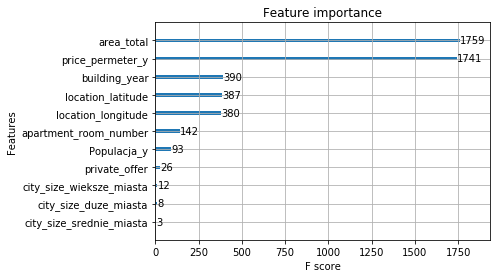

In [154]:
xgb.plot_importance(xg_reg,max_num_features = 15)

In [147]:
xg_reg.feature_importances_

array([2.6460766e-04, 0.0000000e+00, 1.9367834e-04, 2.5777789e-04,
       3.0830048e-04, 1.5841181e-04, 4.6284720e-01, 4.5687091e-01,
       7.8445233e-02, 2.2407876e-04, 0.0000000e+00, 0.0000000e+00,
       9.0254747e-05, 3.3957706e-04], dtype=float32)

In [ ]:
X.columns[drlrctor.get.support()]

na podstawie powyższego wzięto do analizy tylko 10 pierwszych rekordów

In [166]:
# dane pod modele

**regresja wielomianowa**

In [157]:
from sklearn.metrics import r2_score

In [158]:
from statsmodels.formula.api import ols

In [161]:
mul_lin_regress = ols('price ~  area_total+apartment_room_number + location_latitude +location_longitude + building_year + Populacja_y+private_offer', data).fit()
print(mul_lin_regress.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.169e+05   1.11e+04     10.550      0.000    9.52e+04    1.39e+05
area_total             5610.2166     64.297     87.254      0.000    5484.190    5736.244
apartment_room_number -7009.7778   1229.457     -5.702      0.000   -9419.587   -4599.968
location_latitude     -1868.5834    268.032     -6.971      0.000   -2393.943   -1343.224
location_longitude     1741.6696    259.977      6.699      0.000    1232.100    2251.240
building_year            -5.7142      2.644     -2.161      0.031     -10.897      -0.531
Populacja_y               0.1192      0.001    131.169      0.000       0.117       0.121
private_offer          1.919e+04   2121.732      9.046      0.000     1.5e+04    2.34e+04


In [162]:
y_ = mul_lin_regress.predict(data)
print("R^2 statistic:           ", r2_score(Y, y_))
print("Residual Standard Error: ", np.std((Y, y_), ddof=2))

R^2 statistic:            0.5817282648238551
Residual Standard Error:  138129.78321043926


In [163]:
print(mul_lin_regress.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4938.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:09:21   Log-Likelihood:            -3.2162e+05
No. Observations:               24862   AIC:                         6.433e+05
Df Residuals:                   24854   BIC:                         6.433e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.169e+

rozpatrujemy dalej dopasowanie zmiennych, ponieważ prob (F-statistic) jest < 0.05 więc oznacza, że model jako " całość " ma przynajmniej 1den feature, który jest istotny

In [164]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [166]:
train_x.columns

Index(['apartment_room_number', 'apartment_floor', 'building_year',
       'location_latitude', 'location_longitude', 'private_offer',
       'area_total', 'price_permeter_y', 'Populacja_y',
       'city_size_duze_miasta', 'city_size_najwieksze_miasta',
       'city_size_pozostale', 'city_size_srednie_miasta',
       'city_size_wieksze_miasta'],
      dtype='object')

In [167]:
model = LinearRegression()
rfe = RFECV(model)
rfe = rfe.fit(train_x, train_y)

print(rfe.support_) #czy dana zmienna jest istotna
print(rfe.ranking_) 

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[ True False  True  True  True  True  True  True  True  True  True  True
  True  True]
[1 2 1 1 1 1 1 1 1 1 1 1 1 1]


In [168]:
key=X.columns
rank=rfe.ranking_

In [170]:
ranking=dict(zip(key, rank))
ranking

{'apartment_room_number': 1,
 'apartment_floor': 2,
 'building_year': 1,
 'location_latitude': 1,
 'location_longitude': 1,
 'private_offer': 1,
 'area_total': 1,
 'price_permeter_y': 1,
 'Populacja_y': 1,
 'city_size_duze_miasta': 1,
 'city_size_najwieksze_miasta': 1,
 'city_size_pozostale': 1,
 'city_size_srednie_miasta': 1,
 'city_size_wieksze_miasta': 1}

In [ ]:
new_list = {k: v for k,v in ranking.items() if v[1] < 2}

In [177]:
mul_lin_regress2 = ols(" price~ area_total*apartment_room_number + location_latitude +location_longitude + Populacja_y+private_offer", data).fit()
print(mul_lin_regress2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     5009.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:16:30   Log-Likelihood:            -3.2152e+05
No. Observations:               24862   AIC:                         6.431e+05
Df Residuals:                   24854   BIC:                         6.431e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [178]:
pred = mul_lin_regress2.predict(data)
print("R^2 statistic:           ", r2_score(Y, pred))
print("Residual Standard Error: ", np.std((Y, pred), ddof=2))

R^2 statistic:            0.585194708240145
Residual Standard Error:  138281.05983481146


żadne z uproszczeń nie pozwoliło na zwiększenie dokładności modelu

In [175]:
# testowanie modelu

In [179]:
import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import sklearn

In [190]:
data.columns

Index(['apartment_room_number', 'apartment_floor', 'building_year',
       'location_latitude', 'location_longitude', 'private_offer', 'price',
       'area_total', 'price_permeter_y', 'Populacja_y',
       'city_size_duze_miasta', 'city_size_najwieksze_miasta',
       'city_size_pozostale', 'city_size_srednie_miasta',
       'city_size_wieksze_miasta'],
      dtype='object')

In [191]:
x=data[[ 'area_total', 'apartment_room_number','location_latitude','location_longitude','building_year', 'Populacja_y', 'private_offer','city_size_duze_miasta','city_size_najwieksze_miasta','city_size_pozostale','city_size_srednie_miasta','city_size_wieksze_miasta']]
y=data[['price']]

In [192]:
scale1 = preprocessing.MinMaxScaler().fit(x)
x_norm = scale1.transform(x)

scale2 = preprocessing.MinMaxScaler().fit(y)
y_norm = scale2.transform(y)

train_x, test_x, train_y, test_y  = train_test_split(x_norm,y_norm, test_size =0.2, random_state=123)

**drzewo decyzyjne**

In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

In [193]:
regressor = DecisionTreeRegressor()
[train_data, test_data, 
 train_target, test_target] = train_test_split(
    x_norm, y_norm)
regressor.fit(train_data, train_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

AttributeError: 'DecisionTreeRegressor' object has no attribute 'tree_'

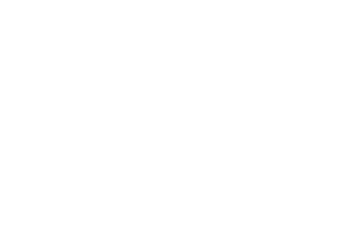

In [198]:
_ = sklearn.tree.plot_tree(regressor)

In [202]:
splitter=['best', 'random']
max_depth=[2,5,1]

In [203]:
best_variables=pd.DataFrame()
for i in max_depth:
    for s in splitter:
        regressor = DecisionTreeRegressor(max_depth=i,splitter=s,random_state=123)

        cv_results = cross_validate(regressor, x_norm, y, cv=10)
        sorted(cv_results)
        
        best_variables1=pd.DataFrame({'głębokość drzewa': [i],
                                     'strategia': [s],
                                     'scorer':[cv_results['test_score']]})

        best_variables=pd.concat([best_variables,best_variables1])

In [204]:
best_variables.head(1)

,głębokość drzewa,strategia,scorer
0,2,best,"[0.2656837031469206, 0.29133677956438375, 0.28..."


In [188]:
best_variables['scorer'].mean()

array([0.24439716, 0.27508739, 0.26420633, 0.45554724, 0.05911779,
       0.24699376, 0.23109861, 0.12068058, 0.03591545, 0.09176676])

model drzewa decyzyjnego nie spełnił swojego zadania, za słabe dopasowanie

**las losowy**

In [205]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import  cross_val_score

In [211]:
from sklearn.model_selection import GridSearchCV

params = {
    # "min_samples_split": range(2, 21, 2),
    # "min_samples_leaf": range(1, 21, 2),
      "n_estimators": range(2,100,1),
      "max_depth": range(3, 6, 3),
      "criterion": ['mse']
 }

forest = RandomForestRegressor()
rf_regressor_search = GridSearchCV(forest, params, cv=5)
rf_regressor_search.fit(train_x, train_y)
rf_regressor_search.best_params_

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn

{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 83}

In [225]:
value_rf=list(rf_regressor_search.best_params_.values())

estymator=value_rf[2]
depth=value_rf[1]

In [226]:
best_rf_regressor = \
    RandomForestRegressor(n_estimators=estymator, max_depth=depth, criterion='mse')
best_rf_regressor.fit(train_x, train_y)
best_rf_regressor.score(test_x, test_y)

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5859984595487646